In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
Global_Power_Dataset = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
Global_Power_Dataset.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
Global_Power_Dataset.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
Global_Power_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [59]:
Global_Power_Dataset_New=Global_Power_Dataset.drop(['gppd_idnr','country','country_long',
       'latitude', 'longitude','other_fuel2',
       'other_fuel3','owner', 'source', 'url',
        'geolocation_source', 'wepp_id','generation_gwh_2013','generation_data_source',
        'estimated_generation_gwh','generation_gwh_2019'],axis='columns'
)

In [60]:
Global_Power_Dataset_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   capacity_mw            907 non-null    float64
 2   primary_fuel           907 non-null    object 
 3   other_fuel1            198 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   year_of_capacity_data  519 non-null    float64
 6   generation_gwh_2014    398 non-null    float64
 7   generation_gwh_2015    422 non-null    float64
 8   generation_gwh_2016    434 non-null    float64
 9   generation_gwh_2017    440 non-null    float64
 10  generation_gwh_2018    448 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.1+ KB


In [64]:
Global_Power_Dataset_New.isnull().sum()

name                       0
capacity_mw                0
primary_fuel               0
other_fuel1              709
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [65]:
Global_Power_Dataset_New['other_fuel1'] = Global_Power_Dataset_New['other_fuel1'].fillna(Global_Power_Dataset_New['other_fuel1'].mode()[0])
Global_Power_Dataset_New['commissioning_year'] = Global_Power_Dataset_New['commissioning_year'].fillna(Global_Power_Dataset_New['commissioning_year'].mode()[0])
Global_Power_Dataset_New['year_of_capacity_data'] = Global_Power_Dataset_New['year_of_capacity_data'].fillna(Global_Power_Dataset_New['year_of_capacity_data'].mode()[0])
Global_Power_Dataset_New['generation_gwh_2014'] = Global_Power_Dataset_New['generation_gwh_2014'].fillna(Global_Power_Dataset_New['generation_gwh_2014'].mode()[0])
Global_Power_Dataset_New['generation_gwh_2015'] = Global_Power_Dataset_New['generation_gwh_2015'].fillna(Global_Power_Dataset_New['generation_gwh_2015'].mode()[0])
Global_Power_Dataset_New['generation_gwh_2016'] = Global_Power_Dataset_New['generation_gwh_2016'].fillna(Global_Power_Dataset_New['generation_gwh_2016'].mode()[0])
Global_Power_Dataset_New['generation_gwh_2017'] = Global_Power_Dataset_New['generation_gwh_2017'].fillna(Global_Power_Dataset_New['generation_gwh_2017'].mode()[0])
Global_Power_Dataset_New['generation_gwh_2018'] = Global_Power_Dataset_New['generation_gwh_2018'].fillna(Global_Power_Dataset_New['generation_gwh_2018'].mode()[0])


In [84]:
Global_Power_Dataset_New.isnull().sum()

name                     0
capacity_mw              0
primary_fuel             0
other_fuel1              0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [66]:
Global_Power_Dataset_New.head(5)

,name,capacity_mw,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,Oil,2011.0,2019.0,0.000000,0.000,0.000000,0.000000,0.000000
1,ADITYA CEMENT WORKS,98.0,Coal,Oil,2015.0,2019.0,0.000000,0.000,0.000000,0.000000,0.000000
2,AES Saurashtra Windfarms,39.2,Wind,Oil,2015.0,2019.0,0.000000,0.000,0.000000,0.000000,0.000000
3,AGARTALA GT,135.0,Gas,Oil,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,Oil,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [67]:
Global_Power_Dataset_New.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,2004.594267,2019.0,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,15.734928,0.0,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1998.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,2014.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,2015.000000,2019.0,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [70]:
Global_Power_Dataset_New.name.nunique()

907

In [71]:
main_primary_fuel = Global_Power_Dataset_New.primary_fuel.value_counts() * 100 / Global_Power_Dataset_New.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

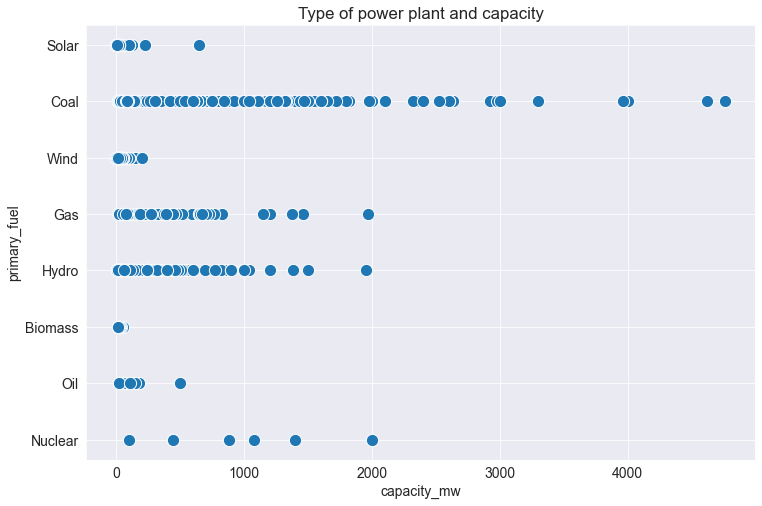

In [72]:
sns.scatterplot(x = Global_Power_Dataset_New.capacity_mw, y = Global_Power_Dataset_New.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [73]:
Plants_capacity = Global_Power_Dataset_New.groupby('name')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
Plants_capacity

,capacity_mw
name,
VINDH_CHAL STPS,4760.0
MUNDRA TPP,4620.0
MUNDRA UMPP,4000.0
SASAN UMPP,3960.0
TIRORA TPP,3300.0
RIHAND,3000.0
TALCHER STPS,3000.0
SIPAT STPS,2980.0
CHANDRAPUR_Coal,2920.0


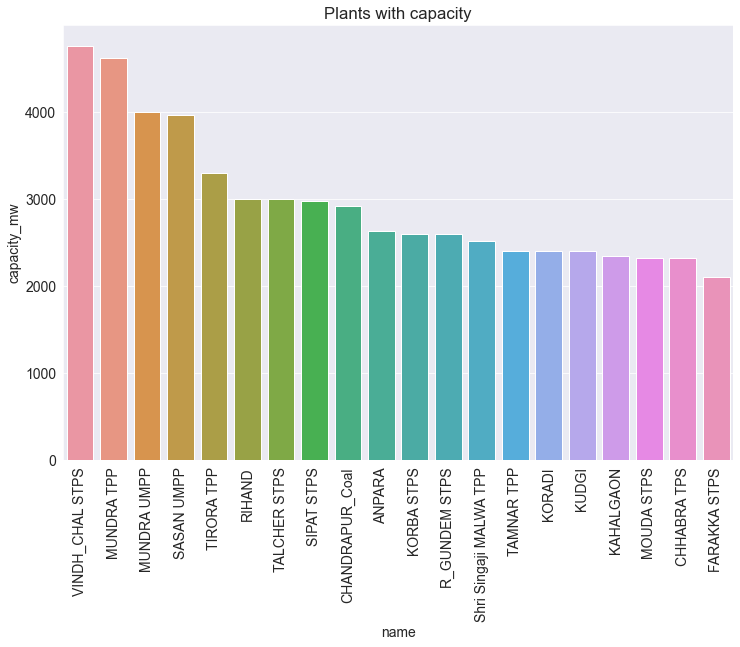

In [74]:
sns.barplot(x = Plants_capacity.index, y = Plants_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Plants with capacity');

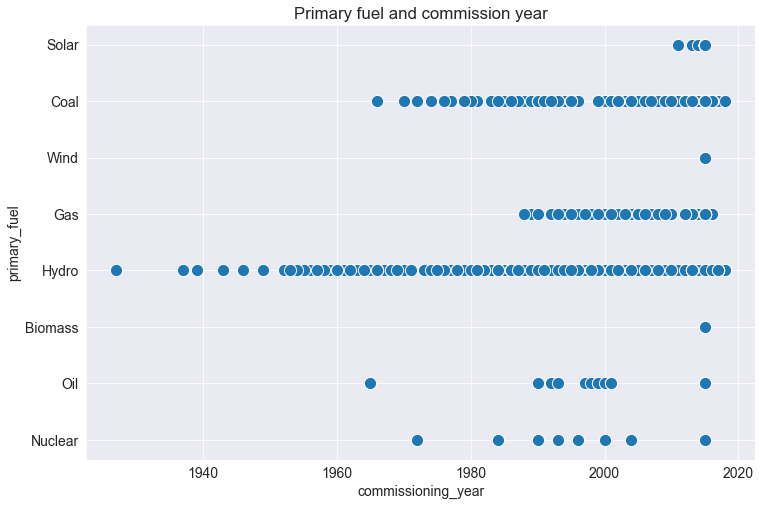

In [75]:
sns.scatterplot(x = Global_Power_Dataset_New.commissioning_year, y = Global_Power_Dataset_New.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

In [76]:
Global_Power_Dataset_New.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [77]:
renewable_energy = Global_Power_Dataset_New[Global_Power_Dataset_New.primary_fuel.isin(['Hydro', 'Wind', 'Solar', 'Biomass'])]
number_of_renewable_energy = renewable_energy.name.value_counts().head(10)
number_of_renewable_energy

ACME Solar Tower                  1
Powerica Theni Wind Farm          1
Patodi Solar Power Plant          1
Phagi Solar Power Plant           1
Pokhran FVE Solar Power Plant     1
Pokhran THE Solar Power Plant     1
Powerica Jangi Vandjiya           1
Powerica Kutch Wind Farm          1
Powerica Tirunelveli Wind Farm    1
PARSEN_S VALLE                    1
Name: name, dtype: int64

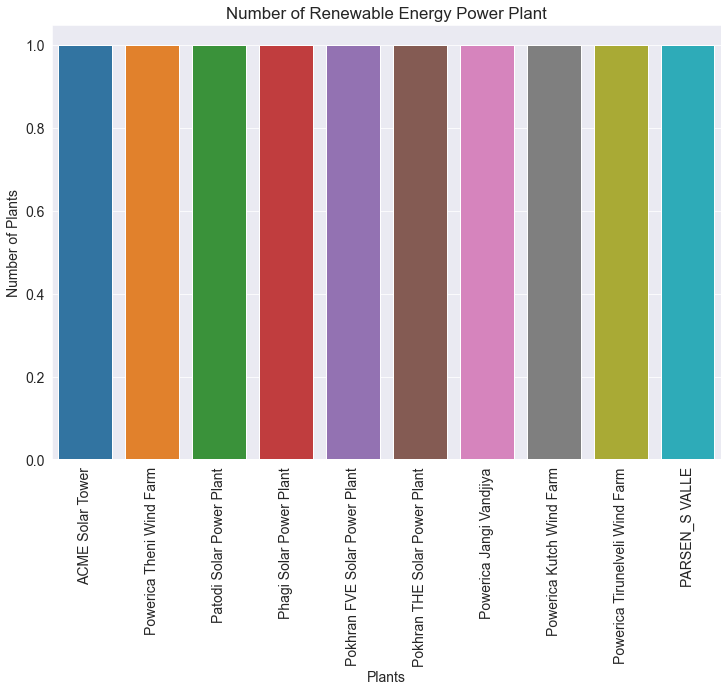

In [78]:
sns.barplot(x = number_of_renewable_energy.index, y = number_of_renewable_energy)
plt.xticks(rotation = 90)
plt.title('Number of Renewable Energy Power Plant')
plt.ylabel('Number of Plants')
plt.xlabel('Plants');

In [79]:
main_primary_fuel = Global_Power_Dataset_New.primary_fuel.value_counts() * 100 / Global_Power_Dataset_New.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

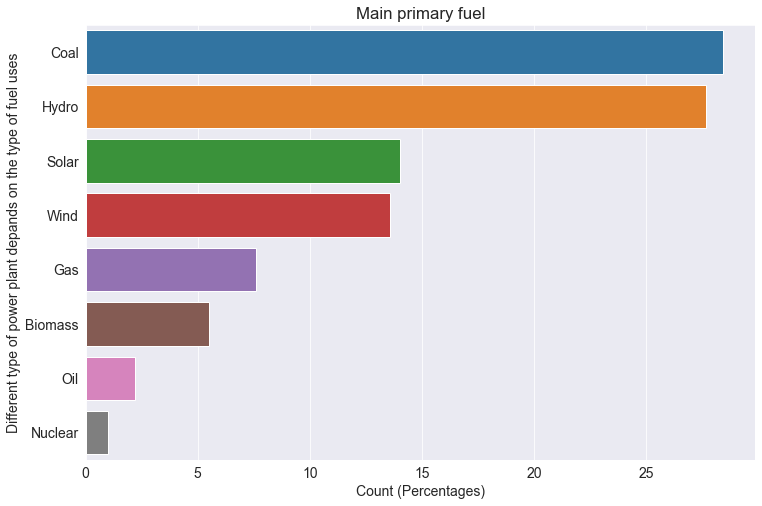

In [80]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

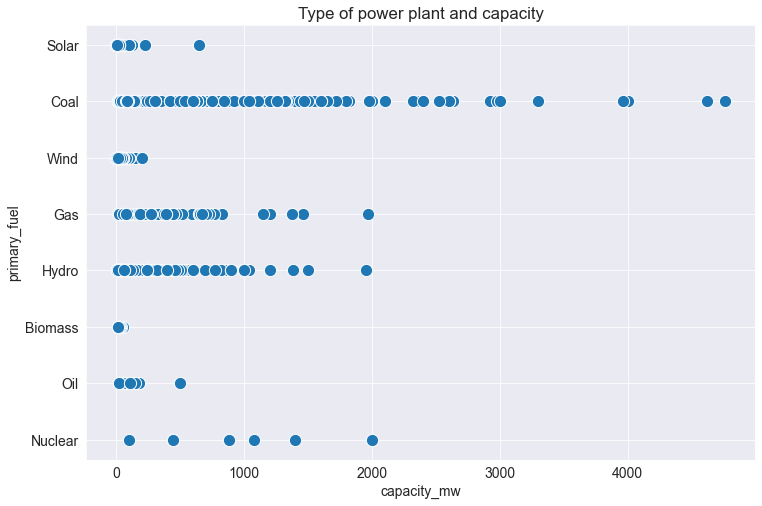

In [81]:
sns.scatterplot(x = Global_Power_Dataset_New.capacity_mw, y = Global_Power_Dataset_New.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [82]:
fosil_fuel = Global_Power_Dataset_New[Global_Power_Dataset_New.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear', 'Petcoke', 'Cogeneration'])]
number_of_fosil_fuel_plant = fosil_fuel.name.value_counts().head(20)
number_of_fosil_fuel_plant

ADITYA CEMENT WORKS          1
NORTH CHENNAI                1
R.A.P.S.                     1
PUNE MILL                    1
PRYAGRAJ (BARA) TPP          1
PRAGATI CCGT                 1
PRAGATI CCCP -III            1
PIPAVAV CCCP                 1
PEDDAPURAM CCGT(Samalkot)    1
PATHADI TPS PH -I            1
PATALGANGA                   1
PARLI                        1
PARICHA                      1
PARAS                        1
PANIPAT                      1
PAMPORE GT                   1
PALATANA CCPP                1
PAINAMPURAM                  1
PAGUTHAN                     1
P.NALLUR CCGT                1
Name: name, dtype: int64

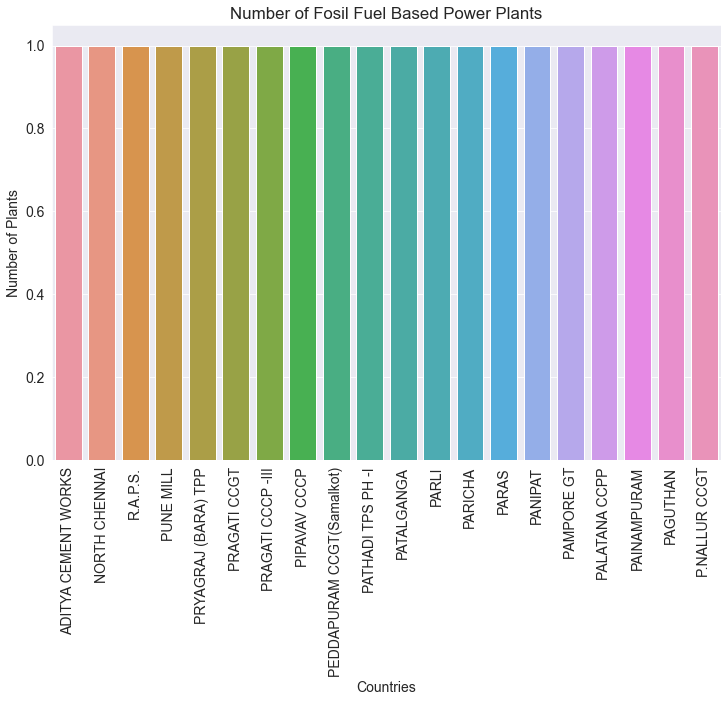

In [83]:
sns.barplot(x = number_of_fosil_fuel_plant.index, y = number_of_fosil_fuel_plant)
plt.xticks(rotation = 90)
plt.title('Number of Fosil Fuel Based Power Plants')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [85]:
X = Global_Power_Dataset_New.drop({'primary_fuel','capacity_mw'},axis=1)

In [86]:
X 

,name,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,Oil,2011.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,ADITYA CEMENT WORKS,Oil,2015.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,AES Saurashtra Windfarms,Oil,2015.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,AGARTALA GT,Oil,2004.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,Oil,2015.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,Oil,2016.0,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,Oil,2015.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,Yelisirur wind power project,Oil,2015.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,ZAWAR MINES,Oil,2015.0,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
y = (Global_Power_Dataset_New['primary_fuel'])
y

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object

In [93]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((725, 9), (182, 9), (725,), (182,))

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, pred)))

ValueError: could not convert string to float: 'PENNA AHOBELAM'

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('accuracy score:', (accuracy_score(y_test, pred)))

ValueError: could not convert string to float: 'PENNA AHOBELAM'